In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
class _basenodes(object):
    def __init__(self):
        self.tag=None
        self.mode=None
        
    def set_attributes(self,tag,mode):
        self.tag=tag
        self.mode=mode
        
    def save(self):
        pass
    
    def initialize(self,pipeline):
        pass
    
    def run(self):
        pass
    
    def get_dataset(self):
        pass
    
    
class pipeline(_basenodes):
    NodeType='Pipeline'
    
        
    def __init__(self):
        self._dataset=None
        self._DG = nx.DiGraph()
        
        self.Sources=[]
        self.Sinks=[]
#         self.DataSets=[]
#         self.TransformFuncs=[]
#         self.Models=[]
    
    def _addnode(self,tag,Node,ParentNode=None):
        if ParentNode is None:
            self._DG.add_node(tag,Node=Node)
        else:
            self._DG.add_edge(ParentNode.tag,tag)
            self._DG.node[tag]['Node']=Node
            
            

    def add_node(self,Node,ParentNode=None):
        if not isinstance(Node,_basenodes):
            raise Exception('Has to be subclass')
        
        typ=Node.NodeType
        
        if Node.tag is None:
            raise Exception('None tag not allowed')
        if ParentNode is not None:
            if ParentNode.tag not in self._DG.nodes:
                raise Exception('Parent tag not there')
            
        if Node.tag in self._DG.nodes:
            raise Exception('tag already exists')
        
        if typ=='Source':
            self.Sources.append(Node.tag)
            self._addnode(Node.tag,Node,ParentNode=ParentNode)
        if typ=='Sink':
            self.Sinks.append(Node.tag)
            self._addnode(Node.tag,Node,ParentNode=ParentNode)
        else:
            self._addnode(Node.tag,Node,ParentNode=ParentNode)
        
        

        
        
    @property
    def mode(self):
        return self._mode
    
    @mode.setter
    def mode(self,val):
        self._mode=val
        for node in self._DG:
            self._DG[node][Node].mode=val
        
    def traversal_path(self):
        path=self.Sources
        ind=0
        while True:
            if len(self._DGsuccessors(path[ind]))==0:
                break
            
            for node in self._DGsuccessors(path[ind]):
                path.append(node)
            
            ind=ind+1
        
        reverse_path=path[-1:]
        path=[]
        for ind in range(len(reverse_path)):
            if reverse_path[ind] not in path:
                path.append(reverse_path[ind])
        
        path=path[-1:]
        return path
    
    def plotpipeline(self):
        options = {
         'node_color': 'blue',
         'font_color': 'white',
         'node_size': 1000,
         'width': 2,
        'font_weight':'bold',
        }
        fig,ax=plt.subplots(1,1,figsize=(15,10))
        nx.draw(self._DG, with_labels=True, **options)
        plt.show()
        
            
    
class Source(_basenodes):
    NodeType='Source'
    pass

class Sink(_basenodes):
    NodeType='Sink'
    pass
    
class DataSet(_basenodes):
    NodeType='DataSet'
    
    
    def has_training_data(self):
        pass
    
    def get_data(self,as_df=False):
        pass
    
    def make_copy_from(self,dataset):
        pass
    def applyfunc(self):
        pass
    
    
class GroupDataSet(_basenodes):
    NodeType='GroupDataSet'
    def __init__(self):
        super(DataSet,self).__init__()
        self.dataset=[]
        
    def has_training_data(self):
        return True
    def get_train_data(self):
        pass
    def iter_test_data(self):
        pass
    
    
class Transform(_basenodes):
    NodeType='Transform'
    def fit(self):
        pass
    def transform(self):
        pass
    def fit_transform(self):
        pass
    

class Model(_basenodes):
    NodeType='Model'
    def train_gridsearch_cv(self):
        pass
    
    def train(self):
        pass
    def predict(self):
        pass
    



In [3]:
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with



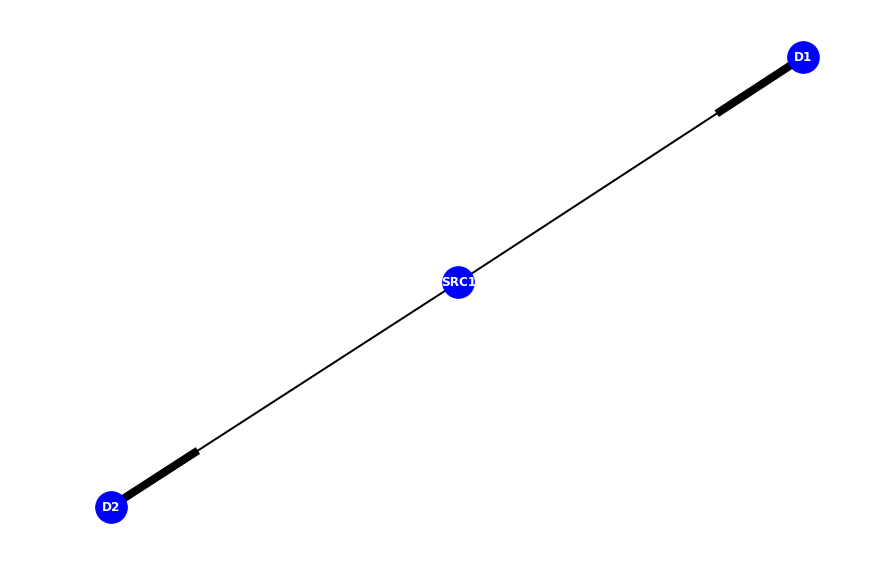

In [45]:
class MyPipeline(pipeline):
    pass
    
class MySource(Source):
    def run(self,ParentNodes=None):
        pass
    
    def getdataset(self):
        iris = datasets.load_iris()
        X = iris.data  # we only take the first two features.
        Y = iris.target
        Meta={}
        data=set([])
        data.add(('Train',X,Y,Meta))
        
        return data
    
        
class MyData(DataSet):
    def run(self,ParentNodes=None):
        for PN in ParentNodes:
            if PN.has_training_data():
                
            D=PN.getdataset()
            

class MyGroupData(DataSet):
    def run(self,ParentNodes=None):
        for PN in ParentNodes:
            D=PN.getdataset()
            self.dataset.append(D)  
            

            
MP=MyPipeline()
MP.set_attributes('Pipe1','Train')

Src1=MySource()
Src1.set_attributes('SRC1','Train')

D1=MyData()
D1.set_attributes('D1','Train')

D2=MyData()
D2.set_attributes('D2','Test')

MP.add_node(Src1,ParentNode=None)
MP.add_node(D1,ParentNode=Src1)
MP.add_node(D2,ParentNode=Src1)

MP.plotpipeline()

In [21]:
DG = nx.DiGraph()
DG.add_node(1,Node='None')
DG.node[1]['Ok']=3
DG.node[1]

{'Node': 'None', 'Ok': 3}

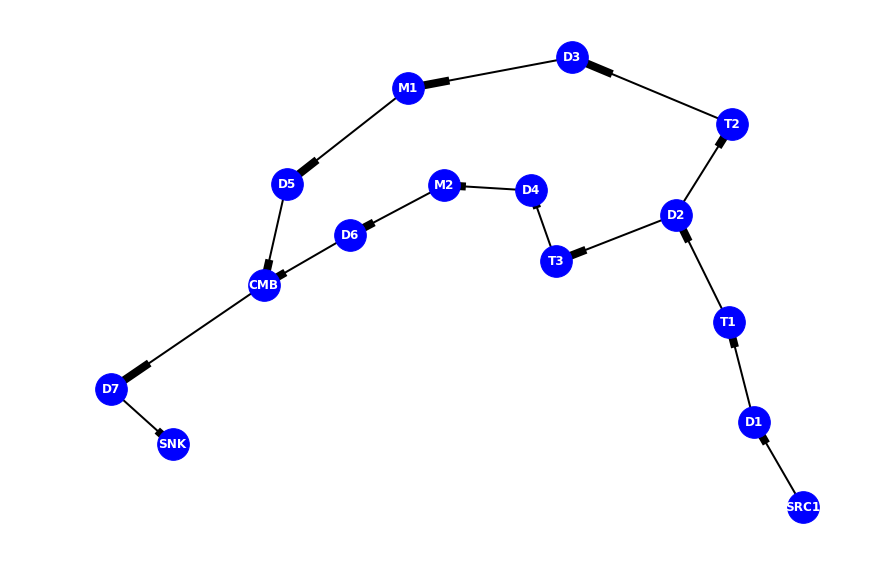

In [5]:
DG = nx.DiGraph()
DG.add_edges_from([('SRC1','D1'),('D1','T1'),('T1','D2'),('D2','T2'),('T2','D3'),('D2','T3'),('T3','D4')],color='green')
DG.add_edges_from([('D3','M1'),('D4','M2'),('M1','D5'),('M2','D6'),('D5','CMB'),('D6','CMB'),('CMB','D7'),('D7','SNK')])
options = {
     'node_color': 'blue',
     'font_color': 'white',
     'node_size': 1000,
     'width': 2,
    'font_weight':'bold',
}
fig,ax=plt.subplots(1,1,figsize=(15,10))
nx.draw(DG, with_labels=True, **options)
plt.show()

In [59]:
DG['SRC1']
for c in DG.successors('D2'):
    print c

T2
T3
